# Imports

In [1]:
#fixing the seed
from numpy.random import seed
seed(888)
from tensorflow.random import set_seed
set_seed(404)

In [2]:
#importing RELEVANT modules 
import numpy as np #to do array tranformations 
from keras.models import Sequential #for neural network model
from keras.layers import Dense, Dropout #for neural network layers 

from PIL import Image # to read images 

from sklearn.metrics import confusion_matrix # to evaluate the model 

import matplotlib.pyplot as plt 
import seaborn as sns

import pandas as pd

import os

# Declare constants 

In [3]:
#FILEPATHS TO READ THE DATA 
X_TRAIN_PATH = 'MNIST/digit_xtrain.csv'
X_TEST_PATH ='MNIST/digit_xtest.csv'
Y_TRAIN_PATH = 'MNIST/digit_ytrain.csv'
Y_TEST_PATH = 'MNIST/digit_ytest.csv'

IMAGE_HEIGHT = 28
IMAGE_WIDTH = 28
COLOR_CHANNELS = 1

TOTAL_INPUTS = IMAGE_HEIGHT*IMAGE_WIDTH*COLOR_CHANNELS #FOR FIRST HIDDEN LAYER 

N_CLASSES = 10 #FOR OUTPUT LAYER 
VALIDATION_SIZE = 10000 #FOR CREATING VALIDATION DATASET

# Read the data 

In [4]:
x_train = np.loadtxt(X_TRAIN_PATH, delimiter=',',dtype=np.int32)
x_test = np.loadtxt(X_TEST_PATH, delimiter=',',dtype=np.int32)
y_train = np.loadtxt(Y_TRAIN_PATH, delimiter=',',dtype=np.int32)
y_test = np.loadtxt(Y_TEST_PATH, delimiter=',',dtype=np.int32)

# Creating validation sets and preprocessing data

In [5]:
x_train = x_train/255.0
x_test = x_test/255.0

In [6]:
x_train = x_train[VALIDATION_SIZE:]
y_train = y_train[VALIDATION_SIZE:]
x_val = x_train[:VALIDATION_SIZE]
y_val = y_train[:VALIDATION_SIZE]

In [7]:
print(f'x train {x_train.shape}')
print(f'y train {y_train.shape}')
print(f'x val {x_val.shape}')
print(f'y val {y_val.shape}')

x train (50000, 784)
y train (50000,)
x val (10000, 784)
y val (10000,)


# Defining the architecture/structure of our model

In [8]:
# declaring hyperparameters 
n_hidden1 = 512
n_hidden2 = 64
prob_dropout = 0.2

n_epochs = 50
batch_size = 1000

In [9]:
model_1 = Sequential([
    Dense(units=n_hidden1,input_dim=TOTAL_INPUTS,activation='relu',name='hidden_1'), #creating the first hidden layer of 512 neurons which recieves 
    #input from 784 neurons and has relu activation function 
    Dropout(prob_dropout, seed=42), #creating a dropout layer which drops 20% of the neurons with a seed of 42
    Dense(units=n_hidden2, activation='relu',name='hidden_2'), #create a hidden layer which has 64 neurons and has an activation function of relu 
    Dense(units=N_CLASSES,activation='softmax',name='output') #create the output layer of 10 neurons with activation function of softmax
])

model_1.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#compile the model by using adam optimizer and using sparse categorical cross entropy loss function and measuring accuracy after each epoch 

In [10]:
# Training our model 
model_1.fit(x_train, y_train, batch_size=batch_size,epochs=n_epochs,validation_data=(x_val,y_val))
#trains our model on x_train and y_train 
#trains it in batches of 1000
#trains the model for 50 iterations/50 epochs 
#validates our model on x_val, y_val

Epoch 1/50
50/50 [==============================] - 14s 16ms/step - loss: 1.1288 - accuracy: 0.6717 - val_loss: 0.2591 - val_accuracy: 0.9258
Epoch 2/50
50/50 [==============================] - 0s 8ms/step - loss: 0.2560 - accuracy: 0.9253 - val_loss: 0.1689 - val_accuracy: 0.9518
Epoch 3/50
50/50 [==============================] - 0s 8ms/step - loss: 0.1782 - accuracy: 0.9485 - val_loss: 0.1257 - val_accuracy: 0.9646
Epoch 4/50
50/50 [==============================] - 0s 7ms/step - loss: 0.1385 - accuracy: 0.9602 - val_loss: 0.0944 - val_accuracy: 0.9737
Epoch 5/50
50/50 [==============================] - 0s 7ms/step - loss: 0.1068 - accuracy: 0.9695 - val_loss: 0.0738 - val_accuracy: 0.9774
Epoch 6/50
50/50 [==============================] - 0s 7ms/step - loss: 0.0905 - accuracy: 0.9727 - val_loss: 0.0590 - val_accuracy: 0.9830
Epoch 7/50
50/50 [==============================] - 0s 7ms/step - loss: 0.0734 - accuracy: 0.9783 - val_loss: 0.0500 - val_accuracy: 0.9860
Epoch 8/50
50/50 [

In [11]:
training_loss, training_accuracy = model_1.evaluate(x=x_train, y=y_train)
print(f'Training set accuracy is {training_accuracy:.3%}')

1563/1563 [==============================] - 4s 2ms/step - loss: 8.9935e-04 - accuracy: 0.9999
Training set accuracy is 99.990%


In [12]:
validation_loss, validation_accuracy = model_1.evaluate(x=x_val, y=y_val)
print(f'validation set accuracy is {validation_accuracy:.3%}')

313/313 [==============================] - 1s 3ms/step - loss: 6.9362e-04 - accuracy: 1.0000
validation set accuracy is 100.000%


In [13]:
test_loss, test_accuracy = model_1.evaluate(x_test, y_test)
print(f'Testing set accuracy is {test_accuracy:.3%}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0749 - accuracy: 0.9823
Testing set accuracy is 98.230%


# Saving our model

In [14]:
model_1.save('mnist_with_keras')

INFO:tensorflow:Assets written to: mnist_with_keras\assets


# Performing predictions

In [15]:
def predict_from_image(filepath):
    img = Image.open(filepath)
    img = img.resize((28,28))
    bw = img.convert(mode='L')
    img_array = np.invert(bw)
    test_img = np.ravel(img_array)
    test_img = np.expand_dims(test_img, axis=0)
    prediction_test_img = model_1.predict(test_img)
    return np.argmax(prediction_test_img, axis=-1)[0]

In [16]:
files = os.listdir('test_handwriting')
for filename in files:
    name = f'test_handwriting/{filename}'
    print(f'The prediction of our model is {predict_from_image(name)}')

The prediction of our model is 0
The prediction of our model is 1
The prediction of our model is 2
The prediction of our model is 3
The prediction of our model is 4
The prediction of our model is 5
The prediction of our model is 5
The prediction of our model is 7
The prediction of our model is 8
The prediction of our model is 9
The prediction of our model is 2
The prediction of our model is 4
The prediction of our model is 6


In [17]:
y_pred = np.argmax(model_1.predict(x_test), axis=-1)

In [18]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [19]:
conf_df = pd.DataFrame(conf_matrix)
display(conf_df)

,0,1,2,3,4,5,6,7,8,9
0,969,1,2,0,1,1,1,2,1,2
1,0,1127,3,0,0,1,2,1,1,0
2,3,1,1012,2,1,0,2,8,3,0
3,0,0,2,985,0,5,0,7,4,7
4,2,0,1,1,961,0,3,2,0,12
5,2,0,0,4,1,878,2,1,2,2
6,5,2,0,0,2,8,940,0,1,0
7,1,4,6,1,0,0,0,1009,1,6
8,1,2,2,2,4,2,3,4,950,4
9,0,3,0,2,4,1,0,5,2,992


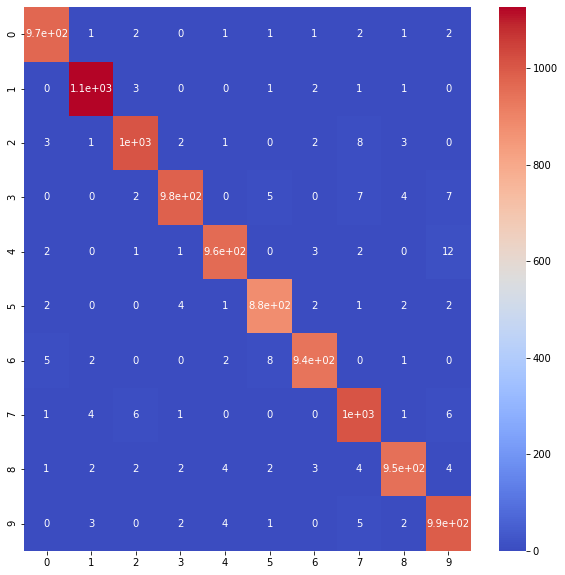

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_df,ax=ax,annot=True,cmap='coolwarm')
plt.show()